Saving audi_dataset(3).xlsx to audi_dataset(3) (1).xlsx
R² Score: 0.8632
                         Feature   Coefficient
29                       color_2  2.466826e+03
19  powertrain_configuration_3.0  2.143508e+03
26              transmission_5.0  2.120199e+03
4       drivetrain_configuration  2.061246e+03
24              transmission_3.0  1.807885e+03
14                      trim_3.0  9.994206e+02
6                          coupe  9.491204e+02
16             engine_capacity_1  8.623355e+02
20  powertrain_configuration_4.0  3.471808e+02
3                     dealership  2.664378e+02
2                       kbb_high  5.888193e-01
5                         s_line  1.293756e-10
9                           rims  5.543654e-11
8                           tint -4.723688e-11
10                       salvage -9.526957e-11
1                         milage -3.656373e-02
30                       color_3 -2.300854e+01
22  powertrain_configuration_8.0 -5.944117e+01
21  powertrain_configuration_5.0 -

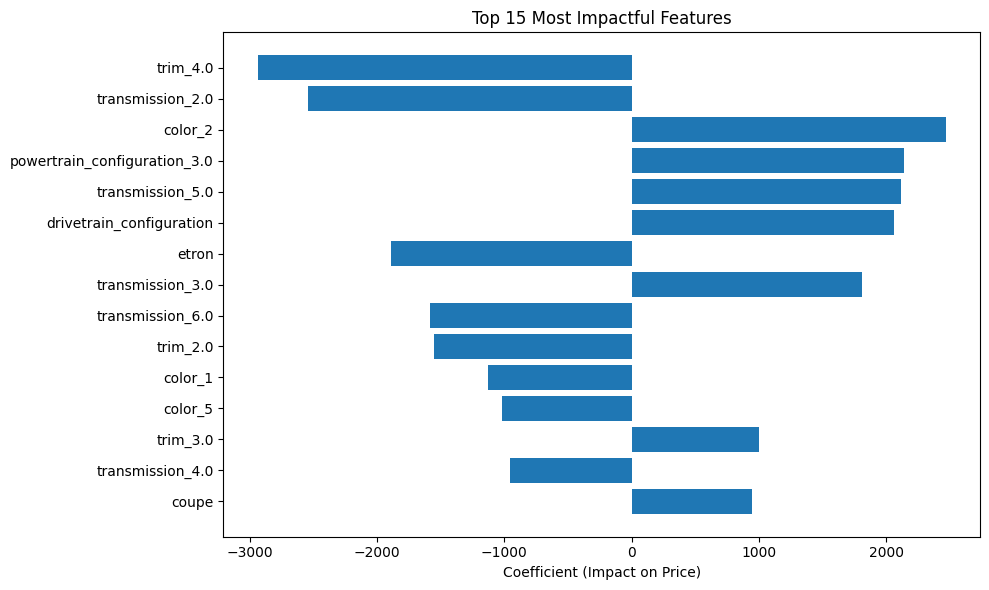

In [2]:
# Imports/Uploads
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from google.colab import files
uploaded = files.upload()

# Load data and define feature types
df = pd.read_excel("audi_dataset(3).xlsx")
numerical_features = ['age', 'milage', 'kbb_high']
categorical_features = ['model', 'trim', 'engine_capacity', 'powertrain_configuration', 'transmission', 'color']
boolean_features = ['dealership', 'drivetrain_configuration', 's_line', 'coupe', 'etron', 'tint', 'rims', 'salvage']
target = 'price'
df = df.dropna()

# Convert boolean features to numeric (0/1)
for col in boolean_features:
    df[col] = df[col].astype(str).str.lower().map({'yes': 1, 'no': 0, 'true': 1, 'false': 0, '1': 1, '0': 0}).fillna(0)

# One-hot encode categorical features
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Define x and y
cat_dummy_columns = [col for col in df.columns
                     if any(col.startswith(f"{cat}_") for cat in categorical_features)]

# Define feature matrix x (numerical + boolean + dummy variables)
X = df[numerical_features + boolean_features + cat_dummy_columns]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

# Coefficient table
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coef_df.sort_values(by='Coefficient', ascending=False))

# Define vehicle features as a dictionary (match feature columns)
# Initialize all features to zero
my_car_features = dict.fromkeys(X.columns, 0)

# Set numerical and boolean features directly
my_car_features.update({
    'age': 9,
    'milage': 83114,
    'dealership': 0,
    'drivetrain_configuration': 1,
    's_line': 0,
    'coupe': 0,
    'etron': 0,
    'tint': 0,
    'rims': 0,
    'kbb_high': 10336,
    'salvage': 1,
})

# Categorical codes
cat_codes = {
    'model': 3,
    'trim': 2.0,
    'engine_capacity': 2,
    'powertrain_configuration': 2,
    'transmission': 1.0,
    'color': 0,
}

# Set the corresponding one-hot columns to 1 for each categorical feature
for cat_feature, code in cat_codes.items():
    # Format the code string to match dummy column names exactly
    if isinstance(code, float) and code.is_integer():
        code_str = f"{int(code)}.0"  # e.g., 2.0 → '2.0'
    else:
        code_str = str(code)

    col_name = f"{cat_feature}_{code_str}"
    if col_name in my_car_features:
        my_car_features[col_name] = 1
    else:
        print(f"Warning: {col_name} not found in features.")

# Convert to DataFrame for prediction
my_car_df = pd.DataFrame([my_car_features])

# Predict price
predicted_price = model.predict(my_car_df)[0]
print(f"\nEstimated price for your vehicle: ${predicted_price:,.2f}")

# Visualizing relationship between single variable and price
import seaborn as sns
#import matplotlib.pyplot as plt
# Scatter plot with regression line
#plt.figure(figsize=(8, 6))
#sns.regplot(x='milage', y='price', data=df, scatter_kws={'alpha':0.5})
#plt.title('Milage vs Price')
#plt.xlabel('Milage')
#plt.ylabel('Price')
#plt.tight_layout()
#plt.show()

# Visualizing relative impact of each variable
import matplotlib.pyplot as plt
top_coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False).head(15)
plt.figure(figsize=(10, 6))
plt.barh(top_coef_df['Feature'], top_coef_df['Coefficient'])
plt.xlabel("Coefficient (Impact on Price)")
plt.title("Top 15 Most Impactful Features")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()